# Regression
Predict the final goals scored per each team.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
pd.set_option('display.max_columns', 999)

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow_core.estimator import inputs
from tensorflow import feature_column
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.models import load_model


import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

from  IPython import display
from matplotlib import pyplot as plt

import numpy as np
import math

import pathlib
import shutil
import tempfile

## Data Preprocessing
    1. Normalization
    2. Data encoding: The goals [0,10] => [-1,1]. If Goal > 10 => 1

In [ ]:
df02 = pd.read_csv('../data/data_regression_goals/sliding02_goals.csv', sep=',', index_col=0)

In [ ]:
df02

In [ ]:
def get_X_and_y(dataframe):
    X = dataframe.drop(columns=['home_team_goal','away_team_goal']).values
    y = dataframe[['home_team_goal','away_team_goal']].values
    return X,y

In [ ]:
def encodelarger(i):
    switcher = {
        0: -1,
        1: -0.8,
        2: -0.6,
        3: -0.4,
        4: -0.2,
        5: 0,
        6: 0.2,
        7: 0.4,
        8: 0.6,
        9: 0.8,
        10: 1,
    }
    # 1 be assigned as default value of passed argument (if goals > 10)
    return switcher.get(i, 1)

def decodelarger(i):
    switcher = {
        -1: 0,
        -0.8: 1,
        -0.6: 2,
        -0.4: 3,
        -0.2: 4,
        0: 5,
        0.2: 6,
        0.4: 7,
        0.6: 8,
        0.8: 9,
        1: 10,
    }
    return switcher.get(i, "ERROR! Use Encode Before!")

In [ ]:
def encode(i):
    if i == 0:
        return 0
    elif (i<= 10):
        return i/10
    else:
        return 1

def decode(i):
    return i * 10

In [ ]:
def normalize(dataframe):
    column_names_to_not_normalize = ['home_team_goal','away_team_goal']
    column_names_to_normalize = [x for x in list(dataframe) if x not in column_names_to_not_normalize ]
    x = dataframe[column_names_to_normalize].values
    x_scaled = preprocessing.normalize(x)
    df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = dataframe.index)
    dataframe[column_names_to_normalize] = df_temp
    
    dataframe['home_team_goal'] = dataframe.apply(lambda row: encodelarger(row['home_team_goal']), axis=1)
    dataframe['away_team_goal'] = dataframe.apply(lambda row: encodelarger(row['away_team_goal']), axis=1)
    
    return dataframe

In [ ]:
n02 = normalize(df02)

train02, test02 = train_test_split(n02, test_size=0.1, shuffle=False)
print(len(train02), 'train examples')
print(len(test02), 'test examples')


train_X02,train_y02 = get_X_and_y(train02)

test_X02,test_y02 = get_X_and_y(test02)

In [ ]:
n02

## Predict Two columns regressions



https://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputRegressor.html

https://scikit-learn.org/stable/modules/multiclass.html#multioutput-regression

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

## 1. MultiOutputRegressor

https://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputRegressor.html

fit(self, X, y[, sample_weight])

get_params(self[, deep])

partial_fit(self, X, y[, sample_weight])

predict(self, X)

score(self, X, y[, sample_weight])

set_params(self, \*\*params)

In [10]:
from sklearn.datasets import make_regression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics

### 1.a: GradientBoostingRegressor

In [11]:
regressor = MultiOutputRegressor(GradientBoostingRegressor(random_state=0)).fit(train_X02, train_y02)

In [12]:
y_train_pred = regressor.predict(train_X02)
y_train_pred_round = np.round(y_train_pred, 1) #trunc(1 val after comma)

acc_h = np.sum(train_y02[:,0] == y_train_pred_round[:,0], axis=0) / train_X02.shape[0]
acc_a = np.sum(train_y02[:,1] == y_train_pred_round[:,1], axis=0) / train_X02.shape[0]
acc = (acc_h + acc_a) /2


print('Training accuracy Final: %.2f%%' % (acc * 100))
print('Training accuracy home team goals: %.2f%%' % (acc_h * 100))
print('Training accuracy away team goals: %.2f%%' % (acc_a * 100))

Training accuracy Final: 20.59%
Training accuracy home team goals: 17.10%
Training accuracy away team goals: 24.08%


In [13]:
y_test_pred = regressor.predict(test_X02)
y_test_pred_round = np.round(y_test_pred, 1)

acc_h = np.sum(test_y02[:,0] == y_test_pred_round[:,0], axis=0) / test_X02.shape[0]
acc_a = np.sum(test_y02[:,1] == y_test_pred_round[:,1], axis=0) / test_X02.shape[0]
acc = (acc_h + acc_a) /2


print('Test accuracy Final: %.2f%%' % (acc * 100))
print('Test accuracy home team goals: %.2f%%' % (acc_h * 100))
print('Test accuracy away team goals: %.2f%%' % (acc_a * 100))

Test accuracy Final: 18.89%
Test accuracy home team goals: 12.93%
Test accuracy away team goals: 24.86%


The coefficient R^2 is defined as (1 - u/v), where u is the residual sum of squares ((y_true - y_pred) ** 2).sum() and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum(). The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.



The R2 score used when calling score on a regressor will use multioutput='uniform_average' from version 0.23 to keep consistent with r2_score. This will influence the score method of all the multioutput regressors (except for MultiOutputRegressor). To specify the default value manually and avoid the warning, please either call r2_score directly or make a custom scorer with make_scorer (the built-in scorer 'r2' uses multioutput='uniform_average').

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor.score


In [14]:
print ("The coefficient of determination R^2 of the predictione:", regressor.score(test_X02, test_y02))

The coefficient of determination R^2 of the predictione: 0.1611793405525126


### 1.b: SVR

In [15]:
from sklearn.svm import SVR

regrsvm = MultiOutputRegressor(SVR(degree=10)).fit(train_X02, train_y02)

y_train_pred = regrsvm.predict(train_X02)
y_train_pred_round = np.round(y_train_pred, 1)

acc_h = np.sum(train_y02[:,0] == y_train_pred_round[:,0], axis=0) / train_X02.shape[0]
acc_a = np.sum(train_y02[:,1] == y_train_pred_round[:,1], axis=0) / train_X02.shape[0]
acc = (acc_h + acc_a) /2


print('Training accuracy Final: %.2f%%' % (acc * 100))
print('Training accuracy home team goals: %.2f%%' % (acc_h * 100))
print('Training accuracy away team goals: %.2f%%' % (acc_a * 100))

D:\ProgrammeFile\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\ProgrammeFile\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Training accuracy Final: 16.22%
Training accuracy home team goals: 13.00%
Training accuracy away team goals: 19.43%


In [16]:
y_test_pred = regrsvm.predict(test_X02)
y_test_pred_round = np.round(y_test_pred, 1)

acc_h = np.sum(test_y02[:,0] == y_test_pred_round[:,0], axis=0) / test_X02.shape[0]
acc_a = np.sum(test_y02[:,1] == y_test_pred_round[:,1], axis=0) / test_X02.shape[0]
acc = (acc_h + acc_a) /2


print('Test accuracy Final: %.2f%%' % (acc * 100))
print('Test accuracy home team goals: %.2f%%' % (acc_h * 100))
print('Test accuracy away team goals: %.2f%%' % (acc_a * 100))

Test accuracy Final: 16.26%
Test accuracy home team goals: 10.51%
Test accuracy away team goals: 22.02%


In [17]:
print ("The coefficient of determination R^2 of the predictione:", regrsvm.score(test_X02, test_y02))

The coefficient of determination R^2 of the predictione: 0.08820860412397197


## 2. Decision tree regressor
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor

In [36]:
from sklearn.tree import DecisionTreeRegressor

regressorDT = DecisionTreeRegressor(random_state=0,max_depth=1,criterion='mse').fit(train_X02, train_y02) #(random_state=0)

In [37]:
y_train_pred = regressorDT.predict(train_X02)
y_train_pred_round = np.round(y_train_pred, 1)

acc_h = np.sum(train_y02[:,0] == y_train_pred_round[:,0], axis=0) / train_X02.shape[0]
acc_a = np.sum(train_y02[:,1] == y_train_pred_round[:,1], axis=0) / train_X02.shape[0]
acc = (acc_h + acc_a) /2


print('Training accuracy Final: %.2f%%' % (acc * 100))
print('Training accuracy home team goals: %.2f%%' % (acc_h * 100))
print('Training accuracy away team goals: %.2f%%' % (acc_a * 100))

Training accuracy Final: 23.18%
Training accuracy home team goals: 32.53%
Training accuracy away team goals: 13.83%


In [38]:
y_test_pred = regressorDT.predict(test_X02)
y_test_pred_round = np.round(y_test_pred, 1)

acc_h = np.sum(test_y02[:,0] == y_test_pred_round[:,0], axis=0) / test_X02.shape[0]
acc_a = np.sum(test_y02[:,1] == y_test_pred_round[:,1], axis=0) / test_X02.shape[0]
acc = (acc_h + acc_a) /2


print('Test accuracy Final: %.2f%%' % (acc * 100))
print('Test accuracy home team goals: %.2f%%' % (acc_h * 100))
print('Test accuracy away team goals: %.2f%%' % (acc_a * 100))

Test accuracy Final: 22.37%
Test accuracy home team goals: 30.82%
Test accuracy away team goals: 13.92%


In [39]:
#print ("The coefficient of determination R^2 of the prediction:", regressorDT.score(test_X02, test_y02))
print ("The coefficient of determination R^2 of the prediction:", metrics.r2_score(test_y02, y_test_pred, sample_weight=None, multioutput='uniform_average'))

The coefficient of determination R^2 of the prediction: 0.08986976537152358


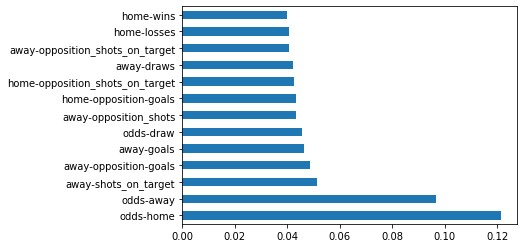

In [22]:
import matplotlib.pyplot as plt
column_names_to_not_normalize = ['home_team_goal','away_team_goal']
column_train = [x for x in list(n02) if x not in column_names_to_not_normalize ]
feat_importances = pd.Series(regressorDT.feature_importances_, index=column_train)
feat_importances.nlargest(13).plot(kind='barh')
plt.show()

## 3. RandomForestRegressor
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor.score

In [25]:
from sklearn.ensemble import RandomForestRegressor
regrRFR = RandomForestRegressor(random_state=0).fit(train_X02, train_y02)

y_train_pred = regrRFR.predict(train_X02)
y_train_pred_round = np.round(y_train_pred, 1) #trunc(1 val after comma)

acc_h = np.sum(train_y02[:,0] == y_train_pred_round[:,0], axis=0) / train_X02.shape[0]
acc_a = np.sum(train_y02[:,1] == y_train_pred_round[:,1], axis=0) / train_X02.shape[0]
acc = (acc_h + acc_a) /2


print('Training accuracy Final: %.2f%%' % (acc * 100))
print('Training accuracy home team goals: %.2f%%' % (acc_h * 100))
print('Training accuracy away team goals: %.2f%%' % (acc_a * 100))

D:\ProgrammeFile\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Training accuracy Final: 45.47%
Training accuracy home team goals: 43.53%
Training accuracy away team goals: 47.42%


In [26]:
y_test_pred = regrRFR.predict(test_X02)
y_test_pred_round = np.round(y_test_pred, 1)

acc_h = np.sum(test_y02[:,0] == y_test_pred_round[:,0], axis=0) / test_X02.shape[0]
acc_a = np.sum(test_y02[:,1] == y_test_pred_round[:,1], axis=0) / test_X02.shape[0]
acc = (acc_h + acc_a) /2


print('Test accuracy Final: %.2f%%' % (acc * 100))
print('Test accuracy home team goals: %.2f%%' % (acc_h * 100))
print('Test accuracy away team goals: %.2f%%' % (acc_a * 100))

Test accuracy Final: 16.12%
Test accuracy home team goals: 14.06%
Test accuracy away team goals: 18.18%


In [27]:
print ("The coefficient of determination R^2 of the prediction:", metrics.r2_score(test_y02, y_test_pred, sample_weight=None, multioutput='uniform_average'))

The coefficient of determination R^2 of the prediction: 0.08455822041935984


## 4. MLPRegressor
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor

### 4.a: solver Adam:

In [28]:
from sklearn.neural_network import MLPRegressor

regMLP = MLPRegressor(hidden_layer_sizes=(100,30,11), activation='relu', solver='adam',alpha=0.001,batch_size='auto',
               learning_rate='constant', learning_rate_init=0.001, max_iter=1000, shuffle=False,
               random_state=None, tol=0.0001).fit(train_X02, train_y02)

In [29]:
y_train_pred = regMLP.predict(train_X02)
y_train_pred_round = np.round(y_train_pred, 1) #trunc(1 val after comma)

acc_h = np.sum(train_y02[:,0] == y_train_pred_round[:,0], axis=0) / train_X02.shape[0]
acc_a = np.sum(train_y02[:,1] == y_train_pred_round[:,1], axis=0) / train_X02.shape[0]
acc = (acc_h + acc_a) /2

print('Training accuracy Final: %.2f%%' % (acc * 100))
print('Training accuracy home team goals: %.2f%%' % (acc_h * 100))
print('Training accuracy away team goals: %.2f%%' % (acc_a * 100))

Training accuracy Final: 18.53%
Training accuracy home team goals: 14.03%
Training accuracy away team goals: 23.04%


In [30]:
y_test_pred = regMLP.predict(test_X02)
y_test_pred_round = np.round(y_test_pred, 1)

acc_h = np.sum(test_y02[:,0] == y_test_pred_round[:,0], axis=0) / test_X02.shape[0]
acc_a = np.sum(test_y02[:,1] == y_test_pred_round[:,1], axis=0) / test_X02.shape[0]
acc = (acc_h + acc_a) /2


print('Test accuracy Final: %.2f%%' % (acc * 100))
print('Test accuracy home team goals: %.2f%%' % (acc_h * 100))
print('Test accuracy away team goals: %.2f%%' % (acc_a * 100))

Test accuracy Final: 18.82%
Test accuracy home team goals: 11.36%
Test accuracy away team goals: 26.28%


In [31]:
print ("The coefficient of determination R^2 of the prediction:", metrics.r2_score(test_y02, y_test_pred, sample_weight=None, multioutput='uniform_average'))

The coefficient of determination R^2 of the prediction: 0.15389244504415656


### 4.b : solver: sgd

In [32]:
regMLP_sgd = MLPRegressor(hidden_layer_sizes=(50,20,11), activation='relu', solver='sgd',alpha=0.001,batch_size='auto',
               learning_rate='constant', learning_rate_init=0.001, max_iter=1000, shuffle=False,
               random_state=None, tol=0.0001).fit(train_X02, train_y02)

In [33]:
y_train_pred = regMLP_sgd.predict(train_X02)
y_train_pred_round = np.round(y_train_pred, 1) #trunc(1 val after comma)

acc_h = np.sum(train_y02[:,0] == y_train_pred_round[:,0], axis=0) / train_X02.shape[0]
acc_a = np.sum(train_y02[:,1] == y_train_pred_round[:,1], axis=0) / train_X02.shape[0]
acc = (acc_h + acc_a) /2


print('Training accuracy Final: %.2f%%' % (acc * 100))
print('Training accuracy home team goals: %.2f%%' % (acc_h * 100))
print('Training accuracy away team goals: %.2f%%' % (acc_a * 100))

Training accuracy Final: 15.01%
Training accuracy home team goals: 0.14%
Training accuracy away team goals: 29.88%


In [34]:
y_test_pred = regMLP_sgd.predict(test_X02)
y_test_pred_round = np.round(y_test_pred, 1)

acc_h = np.sum(test_y02[:,0] == y_test_pred_round[:,0], axis=0) / test_X02.shape[0]
acc_a = np.sum(test_y02[:,1] == y_test_pred_round[:,1], axis=0) / test_X02.shape[0]
acc = (acc_h + acc_a) /2


print('Test accuracy Final: %.2f%%' % (acc * 100))
print('Test accuracy home team goals: %.2f%%' % (acc_h * 100))
print('Test accuracy away team goals: %.2f%%' % (acc_a * 100))

Test accuracy Final: 15.20%
Test accuracy home team goals: 0.14%
Test accuracy away team goals: 30.26%


In [35]:
print ("The coefficient of determination R^2 of the prediction:", metrics.r2_score(test_y02, y_test_pred, sample_weight=None, multioutput='uniform_average'))

The coefficient of determination R^2 of the prediction: -0.0015723711852047573
